## Implementing Grover's Algorithm 

Grover algorithm uses the Grover operator $Q$ to amplify the amplitudes of the good states:
    $$Q= AS_0A^{\dagger}S_f$$

$A$ is the initial search state for the algorithm, which is just Hadamards, $H^{\otimes n}$

$S_0$  is the reflection about the all 0 state
$$ \ket{x} \rightarrow { -\ket{x} when\, x \neq 0 ;  \ket{x} when\,  x = 0}  $$

 
$S_f$ is the oracle that applies, $$ \ket{x} \rightarrow (-1)^{f(x)} \ket{x} $$
    where $f(x)$ is 1 if is a good state and otherwise 0


    

In [44]:
import matplotlib.pyplot as plt
import numpy as np

from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_bloch_vector, plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import UnitaryGate


In [24]:
# import matplotlib.pyplot as plt
# import numpy as np

# from qiskit import QuantumCircuit
# from qiskit_aer import Aer
# from qiskit.visualization import plot_bloch_vector, plot_histogram, plot_bloch_multivector
# from qiskit.quantum_info import Statevector

# q = 2
# n = q +1
# good_state  = '10'
# grover_circuit2 = QuantumCircuit(n, q)
# # U = np.array([[1, 0, 0, 0, 0, 0, 0, 0], [0, -1, 0, 0, 0, 0, 0, 0], [0, 0, -1, 0, 0, 0, 0, 0], [0, 0, 0, -1, 0, 0, 0, 0],
# #                 [0, 0, 0, 0, -1, 0, 0, 0], [0, 0, 0, 0, 0, -1, 0, 0], [0, 0, 0, 0, 0, 0, -1, 0],  [0, 0, 0, 0, 0, 0, 0, -1] ])
# # r_gate = UnitaryGate(U, label='R-gate')

# # grover_circuit2.x(n-2)
# grover_circuit2.x(n-1)
# grover_circuit2.barrier()
# s_operator = lambda qc, n: qc.h(range(n))
# # grover_circuit.h(range(n))
# s_operator(grover_circuit2, n)
# grover_circuit2.barrier()
# def grover_operator(qc: QuantumCircuit, n, good_state):
#     to_all = range(n-1)
#     # for now our good state is always '11' 
#     # if is_good_state == good_state:
#     #     qc.mcz(0,1) # oracle for the good state '11'
#     indices = [i for i, c in enumerate(good_state) if c == '0']
#     print(indices)
#     if indices : qc.x(indices)
#     qc.mcx([0, 1], n-1)
#     if indices: qc.x(indices)

#     # qc.cz(indices[0], indices[1])
#     qc.barrier()
#     qc.h(to_all) # diffusion operator

#     qc.z([0,1])
#     qc.cz(0,1)
    
#     qc.h(to_all)
    
#     # qc.cz(0,1)
#     # qc.cz(1, 2)
#     # qc.cz(0,2)
#     # qc.h(to_all)
#     # qc.barrier()
#     return qc

# grover_circuit2 = grover_operator(grover_circuit2, n, good_state=good_state)
# # grover_circuit = grover_operator(grover_circuit, n, good_state=good_state)
# # grover_circuit = grover_operator(grover_circuit, n, good_state=good_state)



# state = Statevector(grover_circuit2)


# state.draw('latex')




In [71]:

n =  4
t = n+1
good_state  = ['0100', '0110', '1000', '1010']
grover_circuit = QuantumCircuit(t, n)

grover_circuit.x(n)

s_operator = lambda qc, t: qc.h(range(t))

s_operator(grover_circuit, t)


def oracle_function(n, good_state):
    qc = QuantumCircuit(t)
    for sol in good_state:
        indices = [i for i, c in enumerate(sol) if c == '0']
        
        print(indices)
        if indices : 
            qc.x(indices)
            qc.mcx(list(range(n)), n)
            qc.x(indices)
        
    return qc.to_gate(label='O_f')

def diffusion_operator(n):
    qc = QuantumCircuit(n)
    qc.h(range(n)) # diffusion operator
    qc.x(range(n))

    qc.mcp(np.pi, list(range(n-1)), n-1)
    qc.x(range(n))

    qc.h(range(n))

    return qc.to_gate(label='D_o')

def grover_operator( n, good_state):
    qc = QuantumCircuit(n+1)
    oracle_fun = oracle_function(n, good_state)
    qc.append(oracle_fun, range(n+1))

    qc.append(diffusion_operator(n), range(n))

   
    
    return qc.to_gate(label='Grover')

grover_circuit.append(grover_operator(n, good_state=good_state), range(n+1))
# grover_circuit3 = grover_operator(grover_circuit3, n, good_state=good_state)


state = Statevector(grover_circuit)


state.draw('latex')




[0, 2, 3]
[0, 3]
[1, 2, 3]
[1, 3]


<IPython.core.display.Latex object>

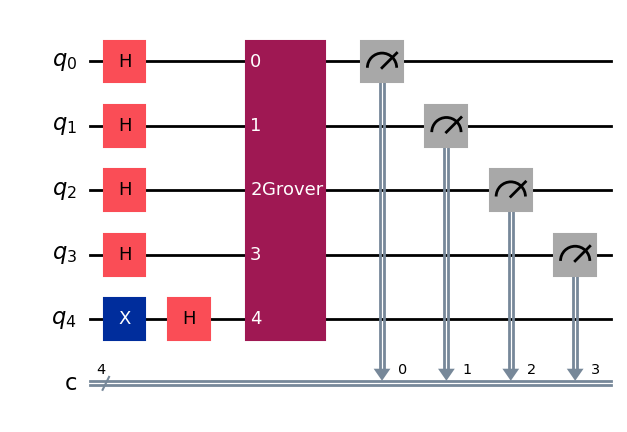

In [72]:
grover_circuit.measure(range(n), range(n))
grover_circuit.draw('mpl')

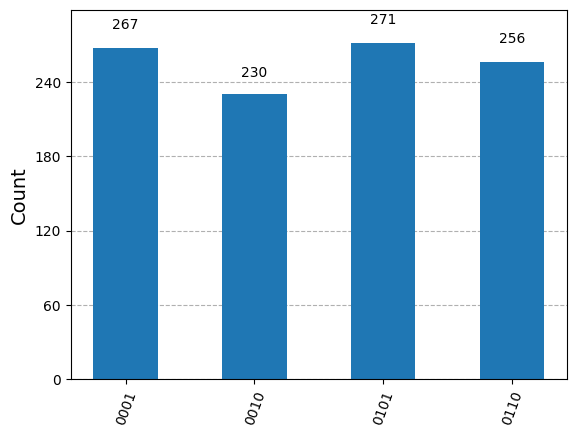

In [73]:
sim = Aer.get_backend('aer_simulator')
trasnpiled_qc = transpile(grover_circuit, sim)

result = sim.run(trasnpiled_qc).result()
counts = result.get_counts()
plot_histogram(counts)

